In [202]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from group_lasso import GroupLasso
from group_lasso import LogisticGroupLasso
from group_lasso.utils import extract_ohe_groups

np.random.seed(42)
LogisticGroupLasso.LOG_LOSSES = True

In [187]:
'''
import matplotlib.pyplot as plt
import numpy as np

from group_lasso import LogisticGroupLasso

np.random.seed(0)
LogisticGroupLasso.LOG_LOSSES = True
group_sizes = [np.random.randint(10, 20) for i in range(50)]
active_groups = [np.random.randint(2) for _ in group_sizes]
groups = np.concatenate([size * [i] for i, size in enumerate(group_sizes)])
num_coeffs = sum(group_sizes)
num_datapoints = 10000
noise_std = 1
print(groups,group_sizes,active_groups)
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfrom group_lasso import LogisticGroupLasso\n\nnp.random.seed(0)\nLogisticGroupLasso.LOG_LOSSES = True\ngroup_sizes = [np.random.randint(10, 20) for i in range(50)]\nactive_groups = [np.random.randint(2) for _ in group_sizes]\ngroups = np.concatenate([size * [i] for i, size in enumerate(group_sizes)])\nnum_coeffs = sum(group_sizes)\nnum_datapoints = 10000\nnoise_std = 1\nprint(groups,group_sizes,active_groups)\n'

In [197]:
df = pd.read_csv('data/diabetes-clean.csv')
df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]
y=df.iloc[:,-1]
df=df.iloc[:,:-1]
ohe = OneHotEncoder()
X=ohe.fit_transform(df.values)
groups = extract_ohe_groups(ohe)
active_group_id=2
print(groups)
group_sizes = [np.sum(groups == g) for g in np.unique(groups)]
print(group_sizes)
active_groups = [0 for _ in np.unique(groups)]
for i in range(len(active_groups)):
    if i==active_group_id:
        active_groups[i]=1
#active_groups = [np.random.randint(0, 2) for _ in np.unique(groups)]
active_groups=np.ones(len(active_groups))
print(active_groups)

[0 0 0 ... 44 45 45]
[45715, 27994, 5, 2, 10, 7, 23, 13, 14, 111, 7, 71, 39, 31, 20, 608, 614, 653, 14, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 3, 1, 1, 4, 3, 2, 2, 1, 1, 2, 2]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [78]:
'''
num_categories = len(active_groups)
min_options = 2
max_options = 10
num_datapoints = df.shape[0]
noise_std = 1
'''

In [112]:
'''
X_cat = np.empty((num_datapoints, num_categories))
for i in range(num_categories):
    X_cat[:, i] = np.random.randint(min_options, max_options, num_datapoints)
print(X_cat.shape)
ohe = OneHotEncoder()
X = ohe.fit_transform(X_cat)
groups = extract_ohe_groups(ohe)
group_sizes = [np.sum(groups == g) for g in np.unique(groups)]
active_groups = [np.random.randint(0, 2) for _ in np.unique(groups)]
print(groups,active_groups)
'''

(10000, 30)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.
  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.
  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.
  9.  9.  9.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 10. 10. 10. 11. 11.
 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13. 13.
 13. 13. 13. 13. 14. 14. 14. 14. 14. 14. 14. 14. 15. 15. 15. 15. 15. 15.
 15. 15. 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17.
 18. 18. 18. 18. 18. 18. 18. 18. 19. 19. 19. 19. 19. 19. 19. 19. 20. 20.
 20. 20. 20. 20. 20. 20. 21. 21. 21. 21. 21. 21. 21. 21. 22. 22. 22. 22.
 22. 22. 22. 22. 23. 23. 23. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 24.
 24. 24. 25. 25. 25. 25. 25. 25. 25. 25. 26. 26. 26. 26. 26. 26. 26. 26.
 27. 27. 27. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 28. 28. 28. 29. 29.
 29. 29. 29. 29. 29. 29.] [0, 1, 1, 1, 

In [198]:
w = np.concatenate(
    [
        np.random.standard_normal(group_size) * is_active
        for group_size, is_active in zip(group_sizes, active_groups)
    ]
)
w = w.reshape(-1, 1)
true_coefficient_mask = w != 0
#intercept = 2
print(w[73709])

[-0.93458573]


In [81]:
'''
y_true = X @ w + intercept
y = y_true + np.random.randn(*y_true.shape) * noise_std
y= (2 / (1 + np.exp(-y))).astype(int)
'''

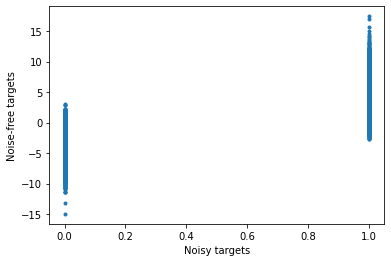

In [82]:
'''
plt.figure()
plt.plot(y, y_true, ".")
plt.xlabel("Noisy targets")
plt.ylabel("Noise-free targets")
# Use noisy y as true because that is what we would have access
# to in a real-life setting.
R2_best = r2_score(y, y_true)
'''

In [199]:
print(X,X_cat.shape,y.shape,groups)
pipe = pipe = Pipeline(
    memory=None,
    steps=[
        (
            "variable_selection",
            LogisticGroupLasso(
            groups=groups,
            group_reg=0.05,
            l1_reg=0,
            scale_reg="inverse_group_size",
            subsampling_scheme=1,
            supress_warning=True,
    ),
        ),
        ("regressor", LogisticRegression(random_state=0)),
    ],
)
pipe.fit(X, y)

  (0, 8)	1.0
  (0, 58986)	1.0
  (0, 73711)	1.0
  (0, 73714)	1.0
  (0, 73717)	1.0
  (0, 73726)	1.0
  (0, 73733)	1.0
  (0, 73762)	1.0
  (0, 73771)	1.0
  (0, 73841)	1.0
  (0, 73894)	1.0
  (0, 73918)	1.0
  (0, 73972)	1.0
  (0, 74011)	1.0
  (0, 74042)	1.0
  (0, 74188)	1.0
  (0, 74731)	1.0
  (0, 75388)	1.0
  (0, 75943)	1.0
  (0, 75953)	1.0
  (0, 75957)	1.0
  (0, 75960)	1.0
  (0, 75964)	1.0
  (0, 75968)	1.0
  (0, 75971)	1.0
  :	:
  (45714, 75961)	1.0
  (45714, 75964)	1.0
  (45714, 75968)	1.0
  (45714, 75971)	1.0
  (45714, 75975)	1.0
  (45714, 75978)	1.0
  (45714, 75981)	1.0
  (45714, 75985)	1.0
  (45714, 75988)	1.0
  (45714, 75991)	1.0
  (45714, 75995)	1.0
  (45714, 75999)	1.0
  (45714, 76003)	1.0
  (45714, 76006)	1.0
  (45714, 76008)	1.0
  (45714, 76011)	1.0
  (45714, 76012)	1.0
  (45714, 76013)	1.0
  (45714, 76017)	1.0
  (45714, 76020)	1.0
  (45714, 76022)	1.0
  (45714, 76024)	1.0
  (45714, 76025)	1.0
  (45714, 76026)	1.0
  (45714, 76029)	1.0 (10000, 30) (45715,) [0 0 0 ... 44 45 45]


Pipeline(steps=[('variable_selection',
                 LogisticGroupLasso(groups=array([0, 0, 0, ..., 44, 45, 45], dtype=object),
                                    l1_reg=0, scale_reg='inverse_group_size',
                                    subsampling_scheme=1,
                                    supress_warning=True)),
                ('regressor', LogisticRegression(random_state=0))])

In [200]:
yhat = pipe.predict(X)
sparsity_mask = pipe["variable_selection"].sparsity_mask_
coef = pipe["regressor"].coef_.T
print(sparsity_mask.reshape(15206,5))
# Construct full coefficient vector
w_hat = np.zeros_like(w)
w_hat[sparsity_mask] = coef

R2 = r2_score(y, yhat)

# Print performance metrics
print(f"Number variables: {len(sparsity_mask)}")
print(f"Number of chosen variables: {sparsity_mask.sum()}")
print(f"R^2: {R2}, best possible R^2 = {R2_best}")
print(coef)

[[ True False  True  True False]
 [ True False  True False  True]
 [ True  True  True  True False]
 ...
 [False False False False False]
 [False False False False False]
 [False False False False False]]
Number variables: 76030
Number of chosen variables: 39295
R^2: -0.1350481929185814, best possible R^2 = -52.933981370628054
[[-0.14357074]
 [ 0.52917888]
 [ 0.41813676]
 ...
 [ 0.32280113]
 [ 0.24621798]
 [-0.14998264]]


[[-0.14357074]
 [ 0.52917888]
 [ 0.41813676]
 ...
 [ 0.32280113]
 [ 0.24621798]
 [-0.14998264]]


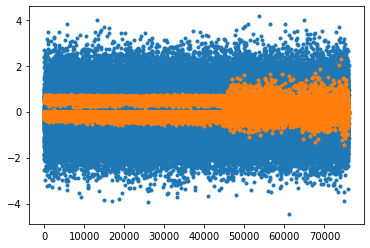

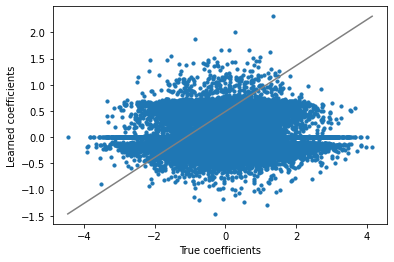

In [201]:
for i in range(w.shape[1]):
    plt.figure()
    plt.plot(w[:, i], ".", label="True weights")
    plt.plot(w_hat[:, i], ".", label="Estimated weights")
print(coef)
plt.figure()
plt.plot([w.min(), w.max()], [coef.min(), coef.max()], "gray")
plt.scatter(w, w_hat, s=10)
plt.ylabel("Learned coefficients")
plt.xlabel("True coefficients")
plt.show()

In [85]:
def load_diabetes():
    df = pd.read_csv('data/diabetes-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "diabetes.abroca.pdf"
    #df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [47]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance,calculate_performance_SP
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from compute_abroca import *
from compute_abroca_diabetes import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
import numpy
from mutar import GroupLasso
from mutar import IndRewLasso
from mutar import IndRewLogistic
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name=load_diabetes()

In [13]:
def load_diabetes_group():
    df = pd.read_csv('data/diabetes-clean.csv')    
    protected_attribute = 'race'
    majority_group_name = 'Caucasian'
    minority_group_name_1 = 'AfricanAmerican'
    minority_group_name_2 = 'Asian'
    minority_group_name_3 = 'Hispanic'
    minority_group_name_4 = 'Other'
    class_label = 'default payment'
    filename = "diabetes.abroca.pdf"
    #df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 2 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4


In [14]:
def run_experiment_diabetes_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4):    
      
    #Run Logistic Regression model
    LR = LogisticRegression(random_state=0)
    coef=LR.fit(X_train,y_train).coef_
    y_predicts = LR.predict(X_test)
    y_pred_probs = LR.predict_proba(X_test)
    print(coef)    
    #Print measures
    print("Equalized odds")
    print(calculate_performance(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
    
    #make predictions
    X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    #Compute Abroca
    slice,prot_attr_values = compute_abroca_diabetes(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name,minority_group_name_1=minority_group_name_1,minority_group_name_2=minority_group_name_2,minority_group_name_3=minority_group_name_3,minority_group_name_4=minority_group_name_4,file_name = filename)
    print("ABROCA:",slice)
    print(prot_attr_values)

In [5]:
def run_eval_diabetes(dataset):
    if dataset == 'diabetes':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4 = load_diabetes_group()
        print(X_test.shape)
        run_experiment_diabetes_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4)

(13715, 46)
[[-2.48914967e-09 -9.49697024e-09 -6.54455305e-16 -1.91943673e-16
  -2.59288948e-15 -1.15192001e-15 -5.25126614e-16 -3.29475709e-15
  -1.79432740e-15 -1.91196329e-14 -5.28094682e-16 -6.04136105e-15
  -1.34599820e-16  8.40692961e-17  2.10188775e-16 -1.34016173e-13
  -9.84136774e-14 -1.03376933e-13 -3.01766066e-15 -8.80270130e-16
  -8.12243148e-16 -5.50167692e-16 -4.43356663e-16 -4.50207745e-16
  -1.79402634e-18 -4.75442461e-16 -9.96626175e-20 -5.10676586e-16
  -5.06325513e-16 -2.10913525e-19 -4.87190452e-16 -4.95903141e-16
  -4.51021747e-16 -4.47190736e-16 -2.23960477e-19 -4.34664672e-19
   0.00000000e+00  0.00000000e+00 -6.14095761e-16 -3.52123721e-18
  -3.50141629e-19 -6.36569113e-20  0.00000000e+00  0.00000000e+00
  -2.68832979e-16 -3.28661477e-16]]
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.758439664600802, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy':

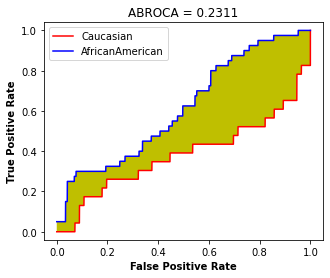

ABROCA: 0.23109629203027926
[0.00000000e+00 1.00010001e-04 2.00020002e-04 ... 9.99799980e-01
 9.99899990e-01 1.00000000e+00]


In [6]:
run_eval_diabetes('diabetes')

In [15]:




def load_german():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class-label'
    filename = "german.abroca.pdf"
    df['class-label'] = [1 if v == 1 else 0 for v in df['class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [16]:
def load_crime():
    df = pd.read_csv('data/communities_crime.csv')    
    protected_attribute = 'Black'
    majority_group_name = "Non-Black"
    minority_group_name = "Black"
    class_label = 'class'
    filename = "crime.abroca.pdf"
    #df['class'] = [1 if v == 1 else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [17]:
def load_compas_recid():
    df = pd.read_csv('data/compas-scores-two-years_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.recid.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]
    df['two_year_recid'] = [1 if v == 1 else 0 for v in df['two_year_recid']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [18]:
def load_dutch():
    df = pd.read_csv('data/dutch.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'occupation'
    filename = "dutch.abroca.pdf"    
    df['sex']=['Male' if v == 'male' else 'Female' for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name



In [19]:
def load_oulad():
    df = pd.read_csv('data/oulad_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'final_result'
    filename = "oulad.abroca.pdf"    
    
    #Label gender
    df['gender']=['Male' if v == 'M' else 'Female' for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [20]:
def load_bank():
    df = pd.read_csv('data/bank-full.csv')    
    protected_attribute = 'marital'
    majority_group_name = "Married"
    minority_group_name = "Non-Married"
    class_label = 'y'
    filename = "bank.abroca.pdf"
    df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [21]:
def load_kdd():
    df = pd.read_csv('data/kdd-census-income-clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income'
    filename = "kdd.abroca.pdf"
    df['income'] = [1 if v == ">50K" else 0 for v in df['income']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [22]:
def load_adult():
    df = pd.read_csv('data/adult-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class-label'
    filename = "adult.abroca.pdf"
    df['Class-label'] = [1 if v == 1 else 0 for v in df['Class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [23]:
def load_compas_viol():
    df = pd.read_csv('data/compas-scores-two-years-violent_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.viol.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]    
    #df["score_text"] = ['Low' if v =='Low' else 'Medium' if v=='Medium' else 'High' for v in df['score_text']]
    df["score_text"] = df["score_text"].astype('str')        
    df["v_score_text"] = df["v_score_text"].astype('object')
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:        
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [24]:
def load_credit():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readmitted'
    filename = "credit.abroca.pdf"
    
    df['SEX'] = ['Male' if v == 1 else 'Female' for v in df['SEX']]
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [25]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'occupation'
    filename = "law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [26]:
def load_ricci():
    df = pd.read_csv('data/ricci_race.csv')    
    protected_attribute = 'Race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'Promoted'
    filename = "ricci.abroca.pdf"    
    
    #Label promoted
    df['Promoted']=[1 if v == 1 else 0 for v in df['Promoted']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [27]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-mat.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [28]:
def load_student_por():
    df = pd.read_csv('data/student_por_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [29]:
def load_adult_reconstruction():
    df = pd.read_csv('data/adult-reconstruction-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income_bin'
    filename = "adult_new.abroca.pdf"
    df['income_bin'] = [1 if v == ">50K" else 0 for v in df['income_bin']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [43]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Logistic Regression model
    #LR = LogisticRegression(random_state=0)
    LR = LogisticRegression(random_state=0)
    coef=LR.fit(X_train,y_train).coef_
    y_predicts = LR.predict(X_test)
    y_pred_probs = LR.predict_proba(X_test)
    print(coef)    
    #Print measures
    print("Equalized odds")
    print(calculate_performance(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
    
    #make predictions
    X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    
    
    
def run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
    train_major_index=[]
    train_minor_index=[]
    test_major_index=[]
    test_minor_index=[]
    #y_df_train=pd.concat([y_train, y_train], axis=1)
    #clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_df_train)
    #LR.fit(X_train,y_df_train)
    #print(y_df_train)
    #Run Logistic Regression model
    for idx, val in enumerate(X_train.values): 
        if val[sa_index]==p_Group:
            train_minor_index.append(idx)
        else:
            train_major_index.append(idx)
    for idx, val in enumerate(X_test.values): 
        if val[sa_index]==p_Group:
            test_minor_index.append(idx)
        else:
            test_major_index.append(idx)    
    X_train_major=X_train.iloc[train_major_index,:]
    y_train_major=y_train.iloc[train_major_index]
    X_train_minor=X_train.iloc[train_minor_index,:]
    y_train_minor=y_train.iloc[train_minor_index]
    X_test_major=X_test.iloc[test_major_index,:]
    y_test_major=y_test.iloc[test_major_index]
    X_test_minor=X_test.iloc[test_minor_index,:]
    y_test_minor=y_test.iloc[test_minor_index]
    max_size_train=min(X_train_minor.shape[0],X_train_major.shape[0])
    X_train_major=numpy.expand_dims(X_train_major[:max_size_train],axis=0)
    y_train_major=numpy.expand_dims(y_train_major[:max_size_train],axis=0)
    X_train_minor=numpy.expand_dims(X_train_minor[:max_size_train],axis=0)
    y_train_minor=numpy.expand_dims(y_train_minor[:max_size_train],axis=0)
    print(X_train_major.shape,X_train_minor.shape)
    X_train_=numpy.concatenate([X_train_major, X_train_minor], axis=0)
    y_train_=numpy.concatenate([y_train_major, y_train_minor], axis=0)
    X_train_=X_train_.astype('float64')
    y_train_=y_train_.astype('float64')
    #print(X_train_.shape,y_train_.shape)
    #gl = GroupLasso(alpha=0.1)
    alpha=[0.1,0.1]
    gl = IndRewLogisticL1(alpha=alpha)
    coef = gl.fit(X_train_, y_train_).coef_
    print(coef)
    max_size_test=min(X_test_minor.shape[0],X_test_major.shape[0])

    X_test_major_=numpy.expand_dims(X_test_major[:max_size_test],axis=0)
    y_test_major_=numpy.expand_dims(y_test_major[:max_size_test],axis=0)
    X_test_minor_=numpy.expand_dims(X_test_minor[:max_size_test],axis=0)
    y_test_minor_=numpy.expand_dims(y_test_minor[:max_size_test],axis=0)
    X_test_major=X_test_major[:max_size_test]
    y_test_major=y_test_major[:max_size_test]
    X_test_minor=X_test_minor[:max_size_test]
    y_test_minor=y_test_minor[:max_size_test]
    X_test_=numpy.concatenate([X_test_major_, X_test_minor_], axis=0)
    y_test_=numpy.concatenate([y_test_major_, y_test_minor_], axis=0)
    X_test_=X_test_.astype('float64')
    y_test_=y_test_.astype('float64')
    X_test=numpy.concatenate([X_test_major, X_test_minor], axis=0)
    y_test=numpy.concatenate([y_test_major, y_test_minor], axis=0)
    
    #y_predicts = gl.predict(X_test_)

    y_pred_probs = gl.predict_proba(X_test_)
    y_predicts=(y_pred_probs*2).astype(int)   
    #Print measures

    y_predicts=numpy.concatenate((y_predicts[0], y_predicts[1]), axis=0)
    y_pred_probs=numpy.concatenate((y_pred_probs[0], y_pred_probs[1]), axis=0)
    print("Equalized odds")
    print(calculate_performance(X_test, y_test, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test, y_test, y_predicts, sa_index, p_Group))
    X_test_major['pred_proba'] = gl.predict_proba(X_test_)[0]
    X_test_major['true_label'] = y_test_major
    X_test_minor['pred_proba'] = gl.predict_proba(X_test_)[1]
    X_test_minor['true_label'] = y_test_minor
    df_test=pd.concat((X_test_major, X_test_minor), axis=0)
    #make predictions
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

    
    
def run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):
    train_major_index=[]
    train_minor_index=[]
    test_major_index=[]
    test_minor_index=[]
    #y_df_train=pd.concat([y_train, y_train], axis=1)
    #clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_df_train)
    #LR.fit(X_train,y_df_train)
    #print(y_df_train)
    #Run Logistic Regression model
    for idx, val in enumerate(X_train.values): 
        if val[sa_index]==p_Group:
            train_minor_index.append(idx)
        else:
            train_major_index.append(idx)
    for idx, val in enumerate(X_test.values): 
        if val[sa_index]==p_Group:
            test_minor_index.append(idx)
        else:
            test_major_index.append(idx)    
    X_train_major=X_train.iloc[train_major_index,:]
    y_train_major=y_train.iloc[train_major_index]
    X_train_minor=X_train.iloc[train_minor_index,:]
    y_train_minor=y_train.iloc[train_minor_index]
    X_test_major=X_test.iloc[test_major_index,:]
    y_test_major=y_test.iloc[test_major_index]
    X_test_minor=X_test.iloc[test_minor_index,:]
    y_test_minor=y_test.iloc[test_minor_index]
    max_size_train=min(X_train_minor.shape[0],X_train_major.shape[0])
    X_train_major=numpy.expand_dims(X_train_major[:max_size_train],axis=0)
    y_train_major=numpy.expand_dims(y_train_major[:max_size_train],axis=0)
    X_train_minor=numpy.expand_dims(X_train_minor[:max_size_train],axis=0)
    y_train_minor=numpy.expand_dims(y_train_minor[:max_size_train],axis=0)
    print(X_train_major.shape,X_train_minor.shape)
    X_train_=numpy.concatenate([X_train_major, X_train_minor], axis=0)
    y_train_=numpy.concatenate([y_train_major, y_train_minor], axis=0)
    X_train_=X_train_.astype('float64')
    y_train_=y_train_.astype('float64')
    #print(X_train_.shape,y_train_.shape)
    gl = GroupLasso(alpha=0.1)
    #alpha=[0.1,0.1]
    #gl = IndRewLogistic(alpha=alpha)
    coef = gl.fit(X_train_, y_train_).coef_
    print(coef)
    max_size_test=min(X_test_minor.shape[0],X_test_major.shape[0])

    X_test_major_=numpy.expand_dims(X_test_major[:max_size_test],axis=0)
    y_test_major_=numpy.expand_dims(y_test_major[:max_size_test],axis=0)
    X_test_minor_=numpy.expand_dims(X_test_minor[:max_size_test],axis=0)
    y_test_minor_=numpy.expand_dims(y_test_minor[:max_size_test],axis=0)
    X_test_major=X_test_major[:max_size_test]
    y_test_major=y_test_major[:max_size_test]
    X_test_minor=X_test_minor[:max_size_test]
    y_test_minor=y_test_minor[:max_size_test]
    X_test_=numpy.concatenate([X_test_major_, X_test_minor_], axis=0)
    y_test_=numpy.concatenate([y_test_major_, y_test_minor_], axis=0)
    X_test_=X_test_.astype('float64')
    y_test_=y_test_.astype('float64')
    X_test=numpy.concatenate([X_test_major, X_test_minor], axis=0)
    y_test=numpy.concatenate([y_test_major, y_test_minor], axis=0)
    
    #y_predicts = gl.predict(X_test_)

    y_pred_probs = gl.predict_proba(X_test_)
    y_predicts=(y_pred_probs*2).astype(int)   
    #Print measures

    y_predicts=numpy.concatenate((y_predicts[0], y_predicts[1]), axis=0)
    y_pred_probs=numpy.concatenate((y_pred_probs[0], y_pred_probs[1]), axis=0)
    print("Equalized odds")
    print(calculate_performance(X_test, y_test, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test, y_test, y_predicts, sa_index, p_Group))
    X_test_major['pred_proba'] = gl.predict_proba(X_test_)[0]
    X_test_major['true_label'] = y_test_major
    X_test_minor['pred_proba'] = gl.predict_proba(X_test_)[1]
    X_test_minor['true_label'] = y_test_minor
    df_test=pd.concat((X_test_major, X_test_minor), axis=0)
    #make predictions
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)

In [31]:
#Main function
def run_eval(dataset):
    if dataset == 'adult-gender':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'kdd':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'german':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'bank':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'crime':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'compas-recid':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'compas-viol':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'diabetes':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'dutch':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'oulad':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'ricci':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'adult-reconstruction':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                                
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                                

In [42]:
run_eval('german')

AttributeError: 'Lasso' object has no attribute 'predict_proba'

[[-2.60064052e-09 -9.13436684e-09 -6.51923406e-16 -1.93964761e-16
  -2.61700599e-15 -1.14277920e-15 -5.87543572e-16 -3.28246973e-15
  -1.80158851e-15 -1.95353450e-14 -5.76423933e-16 -6.00878680e-15
  -1.38984880e-16  8.13163338e-17  2.09525269e-16 -1.34680593e-13
  -1.02000124e-13 -1.02007623e-13 -3.04153271e-15 -8.80880976e-16
  -8.16332019e-16 -5.50129253e-16 -4.46311277e-16 -4.48158095e-16
  -2.01846082e-18 -4.77647971e-16 -9.81589155e-20 -5.12343711e-16
  -5.07451055e-16 -1.72094951e-19 -4.89786694e-16 -4.95096831e-16
  -4.50704448e-16 -4.47129398e-16 -2.21734245e-19 -3.96992236e-19
   0.00000000e+00  0.00000000e+00 -5.89478031e-16 -4.19747630e-18
  -1.91314714e-19 -6.24509318e-20  0.00000000e+00  0.00000000e+00
  -2.68705365e-16 -3.33528632e-16]]
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.7587313160772876, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accu

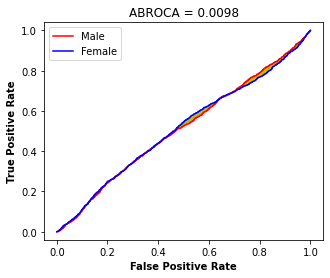

ABROCA: 0.009847153537011492
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.7587313160772876, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.7587313160772876, 'fairness': 0.0, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.0, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 1.0}


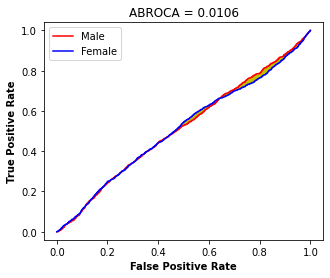

ABROCA: 0.010594043531956976
(1, 14497, 46) (1, 14497, 46)
[[ 2.73234897e-10  2.15180595e-10]
 [-1.32221612e-10 -1.24537156e-10]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 6.48289944e-03  6.63286491e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.05090684e-03  1.05056144e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.96107554e-03  1.98168826e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.03367293e-03  3.55147928e-03]
 [ 1.42572400e-04  1.28719874e-04]
 [ 1.22542602e-04  1.04113944e-04]
 [ 9.66814472e-05  1.31355997e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+

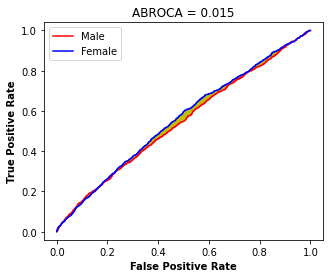

ABROCA: 0.015012036990208314


In [35]:
run_eval('diabetes')

[[ 0.23940141 -0.27683642  0.29527672  0.1458822  -0.33763911 -0.14286951
   0.02290824]]
Equalized odds
{'balanced_accuracy': 0.6298646667147424, 'accuracy': 0.6414141414141414, 'fairness': 0.6451739512144301, 'TPR_protected': 0.5995934959349594, 'TPR_non_protected': 0.205761316872428, 'TNR_protected': 0.679324894514768, 'TNR_non_protected': 0.9306666666666666}
Statistical parity
{'balanced_accuracy': 0.6298646667147424, 'accuracy': 0.6414141414141414, 'fairness': -0.33975557297634124, 'Positive_prot_pred': 0.46273291925465837, 'Positive_non_prot_pred': 0.12297734627831715, 'Negative_prot_pred': 0.5372670807453416, 'Negative_non_prot_pred': 0.8770226537216829}


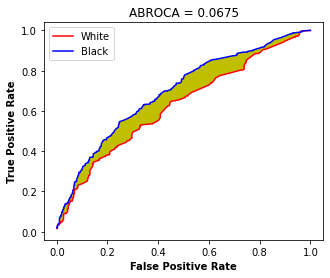

ABROCA: 0.06748075798624793
Equalized odds
{'balanced_accuracy': 0.622989831975193, 'accuracy': 0.6325757575757576, 'fairness': 0.6658598663154939, 'TPR_protected': 0.6239837398373984, 'TPR_non_protected': 0.21810699588477367, 'TNR_protected': 0.6413502109704642, 'TNR_non_protected': 0.9013333333333333}
Statistical parity
{'balanced_accuracy': 0.622989831975193, 'accuracy': 0.6325757575757576, 'fairness': -0.34815775191461135, 'Positive_prot_pred': 0.4937888198757764, 'Positive_non_prot_pred': 0.14563106796116504, 'Negative_prot_pred': 0.5062111801242236, 'Negative_non_prot_pred': 0.8543689320388349}


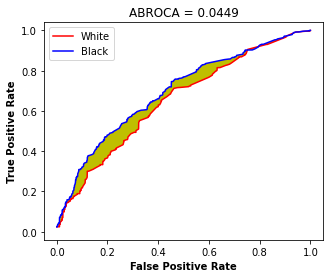

ABROCA: 0.04485445370475038
(1, 1485, 7) (1, 1485, 7)
[[0.02147713 0.05250355]
 [0.         0.        ]
 [0.05776237 0.09195576]
 [0.04739675 0.04046048]
 [0.         0.        ]
 [0.01191474 0.0105397 ]
 [0.1156126  0.10623327]]
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.4522653721682848, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.4522653721682848, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}


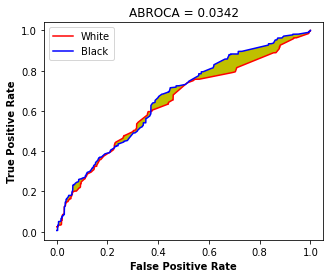

ABROCA: 0.03415673781197522


In [36]:
run_eval('compas-recid')

[[ 1.22079768  0.22266763 -0.01002492 -0.04207365  0.02188166 -0.0704342
  -0.21433238  1.31324659  0.15213459 -0.05588078 -0.00998445]]
Equalized odds
{'balanced_accuracy': 0.8138880779389103, 'accuracy': 0.8150171025046894, 'fairness': 0.37440794266550004, 'TPR_protected': 0.6988150098749177, 'TPR_non_protected': 0.838295596362988, 'TNR_protected': 0.9220566562960537, 'TNR_non_protected': 0.6871293001186239}
Statistical parity
{'balanced_accuracy': 0.8138880779389103, 'accuracy': 0.8150171025046894, 'fairness': 0.35682091510971253, 'Positive_prot_pred': 0.2841990158556588, 'Positive_non_prot_pred': 0.6410199309653714, 'Negative_prot_pred': 0.7158009841443411, 'Negative_non_prot_pred': 0.35898006903462865}


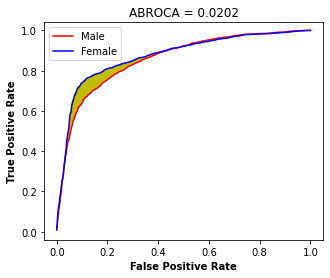

ABROCA: 0.02023404912129715
Equalized odds
{'balanced_accuracy': 0.8167328439670277, 'accuracy': 0.8173342160432527, 'fairness': 0.40560971770603815, 'TPR_protected': 0.7086899275839368, 'TPR_non_protected': 0.8550543768942771, 'TNR_protected': 0.9220566562960537, 'TNR_non_protected': 0.6628113879003559}
Statistical parity
{'balanced_accuracy': 0.8167328439670277, 'accuracy': 0.8173342160432527, 'fairness': 0.3731373608180419, 'Positive_prot_pred': 0.28747949699289227, 'Positive_non_prot_pred': 0.6606168578109342, 'Negative_prot_pred': 0.7125205030071077, 'Negative_non_prot_pred': 0.3393831421890658}


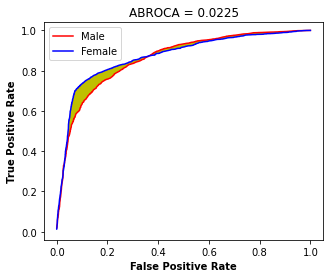

ABROCA: 0.02252960416705329
(1, 21128, 11) (1, 21128, 11)
[[-0.00000000e+00  0.00000000e+00]
 [ 3.36314193e-02  1.95174391e-02]
 [ 2.39510028e-04 -3.31004927e-05]
 [ 3.17410952e-03  1.47773012e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 1.49556397e-01  1.80754479e-01]
 [ 2.06986470e-03  1.20624896e-03]
 [-7.94312080e-03 -3.80135335e-03]
 [ 0.00000000e+00 -0.00000000e+00]]
Equalized odds
{'balanced_accuracy': 0.5252877760956485, 'accuracy': 0.504676539360873, 'fairness': 0.09836012625097994, 'TPR_protected': 0.986232370718603, 'TPR_non_protected': 0.9998217151007309, 'TNR_protected': 0.08595702148925537, 'TNR_non_protected': 0.0011862396204033216}
Statistical parity
{'balanced_accuracy': 0.5252877760956485, 'accuracy': 0.504676539360873, 'fairness': 0.06146308874290174, 'Positive_prot_pred': 0.9379801803808039, 'Positive_non_prot_pred': 0.9994432691237056, 'Negative_prot_pred': 0.06201981961919608, 'Negative_non_prot_p

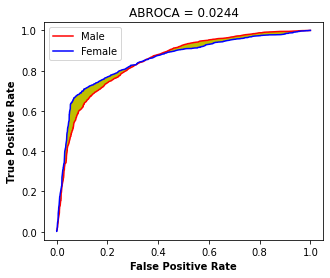

ABROCA: 0.024408768926643995


In [37]:
run_eval('dutch')

[[ 6.82636026e-12  4.79442739e-12  8.13895254e-07  1.00270891e-12
   1.34185206e-11  4.72618274e-13  1.48659127e-11  9.82093983e-13
  -5.46541049e-13  1.51573797e-10  8.09193446e-14]]
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}


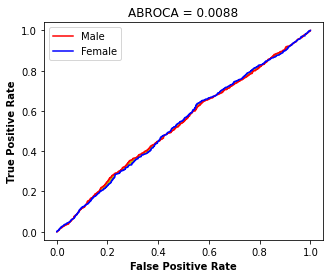

ABROCA: 0.008799362946990396
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}


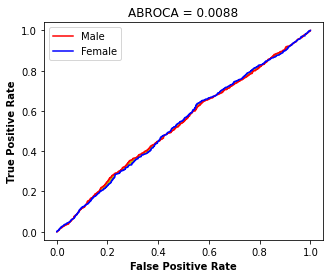

ABROCA: 0.008799362946990396
(1, 7025, 11) (1, 7025, 11)
[[ 3.03224776e-02  2.95380303e-02]
 [ 3.18905427e-02  3.63303824e-02]
 [ 1.41231875e-07  1.12447956e-07]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.12521394e-02  1.65509811e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [ 3.33561304e-02  3.93360047e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 1.98623458e-03  2.33160882e-03]
 [-0.00000000e+00  0.00000000e+00]]
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.675479959582351, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.675479959582351, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}


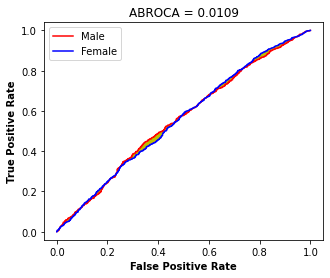

ABROCA: 0.010930429757397523


In [38]:
run_eval('oulad')

[[-2.63384428e-02  1.12807590e-02 -2.16326743e-02 -4.79733701e-03
  -6.42739472e-03  4.81312465e-05 -2.20662695e-01 -6.04036260e-02
  -2.23803267e-01 -2.05062923e-02 -6.20990538e-02  3.31679795e-03
  -3.14092216e-01 -1.05640589e-03  1.30095289e-01 -2.11214983e-01]]
Equalized odds
{'balanced_accuracy': 0.568746791947903, 'accuracy': 0.884685885685719, 'fairness': 0.032938695684864544, 'TPR_protected': 0.1431980906921241, 'TPR_non_protected': 0.17094017094017094, 'TNR_protected': 0.9844792375765827, 'TNR_non_protected': 0.979282622139765}
Statistical parity
{'balanced_accuracy': 0.568746791947903, 'accuracy': 0.884685885685719, 'fairness': 0.015132855311548538, 'Positive_prot_pred': 0.02859586948551876, 'Positive_non_prot_pred': 0.0437287247970673, 'Negative_prot_pred': 0.9714041305144813, 'Negative_non_prot_pred': 0.9562712752029328}


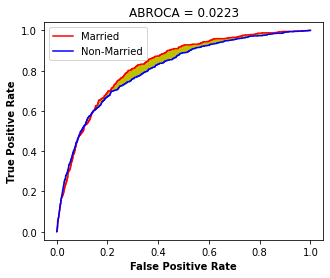

ABROCA: 0.022311460327157435
Equalized odds
{'balanced_accuracy': 0.5775988402221163, 'accuracy': 0.8863522746208965, 'fairness': 0.08034396327062324, 'TPR_protected': 0.14439140811455847, 'TPR_non_protected': 0.21367521367521367, 'TNR_protected': 0.9857045609257998, 'TNR_non_protected': 0.9746444032158318}
Statistical parity
{'balanced_accuracy': 0.5775988402221163, 'accuracy': 0.8863522746208965, 'fairness': 0.02658443793433381, 'Positive_prot_pred': 0.02761823292191128, 'Positive_non_prot_pred': 0.05420267085624509, 'Negative_prot_pred': 0.9723817670780888, 'Negative_non_prot_pred': 0.9457973291437549}


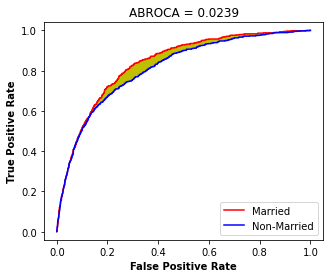

ABROCA: 0.02385377642779031
(1, 8971, 16) (1, 8971, 16)
[[-5.94564282e-04 -1.17645164e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 5.75592949e-06  3.87584678e-06]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 1.13425871e-04 -7.44674080e-04]
 [-0.00000000e+00 -0.00000000e+00]
 [ 5.30318253e-04  4.31278609e-04]
 [-0.00000000e+00 -0.00000000e+00]
 [ 3.32885360e-04  3.13547296e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]]
Equalized odds
{'balanced_accuracy': 0.5239705440336639, 'accuracy': 0.17059439643885835, 'fairness': 0.010252362508001607, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.05292397660818714, 'TNR_non_protected': 0.04267161410018553}
Statistical parity
{'balanced_accuracy': 0.5239705440336639, 'accuracy': 0.17059439643885835, 'fairness': 0.011259492013616201, 'Po

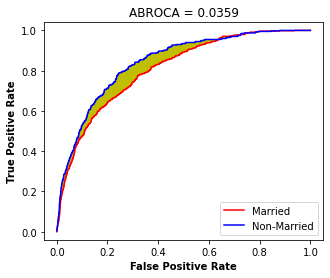

ABROCA: 0.03590732708333771


In [39]:
run_eval('bank')

Equalized odds
{'balanced_accuracy': 0.6248674732959164, 'accuracy': 0.7863934547062725, 'fairness': 0.02811593977100657, 'TPR_protected': 0.3193612774451098, 'TPR_non_protected': 0.3007309432648799, 'TNR_protected': 0.952054794520548, 'TNR_non_protected': 0.9425691889297713}
Statistical parity
{'balanced_accuracy': 0.6248674732959164, 'accuracy': 0.7863934547062725, 'fairness': 0.055491557882133696, 'Positive_prot_pred': 0.07855052892189962, 'Positive_non_prot_pred': 0.13404208680403332, 'Negative_prot_pred': 0.9214494710781004, 'Negative_non_prot_pred': 0.8659579131959667}


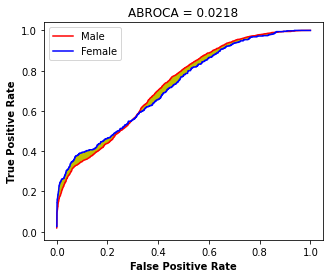

ABROCA: 0.021836589727603346
Equalized odds
{'balanced_accuracy': 0.6296385654904214, 'accuracy': 0.7987764428392423, 'fairness': 0.09690723369137333, 'TPR_protected': 0.2435129740518962, 'TPR_non_protected': 0.30177514792899407, 'TNR_protected': 0.9898528665651953, 'TNR_non_protected': 0.9512078067509199}
Statistical parity
{'balanced_accuracy': 0.6296385654904214, 'accuracy': 0.7987764428392423, 'fairness': 0.09199058304207525, 'Positive_prot_pred': 0.03646185010128292, 'Positive_non_prot_pred': 0.12845243314335816, 'Negative_prot_pred': 0.9635381498987171, 'Negative_non_prot_pred': 0.8715475668566418}


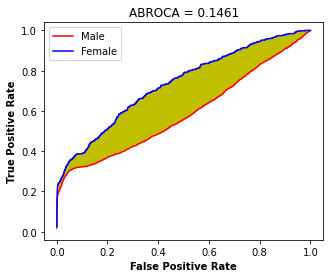

ABROCA: 0.14607477091888518
(1, 10252, 14) (1, 10252, 14)
Equalized odds
{'balanced_accuracy': 0.7145957533466789, 'accuracy': 0.8480756245779878, 'fairness': 0.33134439751818096, 'TPR_protected': 0.29141716566866266, 'TPR_non_protected': 0.544055944055944, 'TNR_protected': 0.984779299847793, 'TNR_non_protected': 0.9060736807168934}
Statistical parity
{'balanced_accuracy': 0.7145957533466789, 'accuracy': 0.8480756245779878, 'fairness': 0.1924375422012154, 'Positive_prot_pred': 0.046365068647310374, 'Positive_non_prot_pred': 0.23880261084852578, 'Negative_prot_pred': 0.9536349313526896, 'Negative_non_prot_pred': 0.7611973891514743}


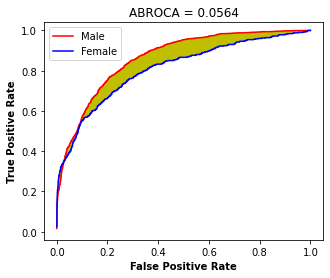

ABROCA: 0.0564203716745199


In [233]:
run_eval('adult-gender')

Equalized odds
{'balanced_accuracy': 0.6038527834451461, 'accuracy': 0.9478955568310939, 'fairness': 0.03315127847895971, 'TPR_protected': 0.18879855465221318, 'TPR_non_protected': 0.21930042173158026, 'TNR_protected': 0.9961944739148485, 'TNR_non_protected': 0.9935450625152559}
Statistical parity
{'balanced_accuracy': 0.6038527834451461, 'accuracy': 0.9478955568310939, 'fairness': 0.019020311584695068, 'Positive_prot_pred': 0.008411109861688968, 'Positive_non_prot_pred': 0.02743142144638404, 'Negative_prot_pred': 0.9915888901383111, 'Negative_non_prot_pred': 0.972568578553616}


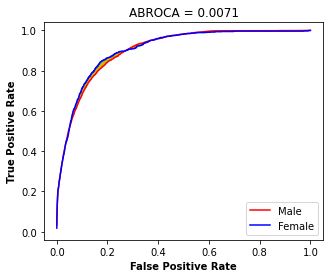

ABROCA: 0.007130919631565035
Equalized odds
{'balanced_accuracy': 0.624554288330192, 'accuracy': 0.9484578349947872, 'fairness': 0.24049132629155312, 'TPR_protected': 0.07859078590785908, 'TPR_non_protected': 0.3051352021830811, 'TNR_protected': 0.9991927671940588, 'TNR_non_protected': 0.9852458571777277}
Statistical parity
{'balanced_accuracy': 0.624554288330192, 'accuracy': 0.9484578349947872, 'fairness': 0.04062823122683344, 'Positive_prot_pred': 0.0027437310244012142, 'Positive_non_prot_pred': 0.04337196225123466, 'Negative_prot_pred': 0.9972562689755988, 'Negative_non_prot_pred': 0.9566280377487654}


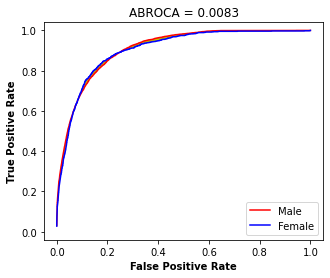

ABROCA: 0.008309085324734782
(1, 95545, 36) (1, 95545, 36)
Equalized odds
{'balanced_accuracy': 0.6343874163582898, 'accuracy': 0.948608869981908, 'fairness': 0.257596902092586, 'TPR_protected': 0.0812133072407045, 'TPR_non_protected': 0.3252294715951377, 'TNR_protected': 0.9994232698094283, 'TNR_non_protected': 0.9858425320712755}
Statistical parity
{'balanced_accuracy': 0.6343874163582898, 'accuracy': 0.948608869981908, 'fairness': 0.042222874187081316, 'Positive_prot_pred': 0.002591560314899027, 'Positive_non_prot_pred': 0.044814434501980346, 'Negative_prot_pred': 0.997408439685101, 'Negative_non_prot_pred': 0.9551855654980197}


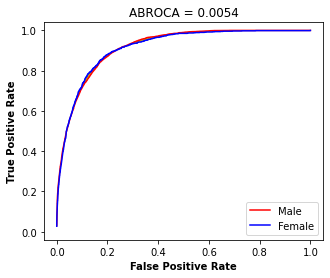

ABROCA: 0.005423302849596759


In [236]:
run_eval("kdd")

[[-3.22069058e-03  1.74184141e-04 -3.90612985e-02 -3.74736860e-02
  -4.69471531e-01  8.06129122e-01 -8.07056806e-01  6.96848067e-02
  -1.32508655e-01 -3.21945073e-01 -2.39814128e-01 -1.63406266e-01
   8.06519771e-02 -1.74473300e-02  5.08542193e-01 -1.82435373e-01
  -2.56537156e-01 -3.86395919e-01 -3.32368213e-01 -2.43393665e-02
  -1.85452772e-01 -1.68545438e-01 -1.93792440e-01 -3.74889751e-02
   6.72694260e-02 -5.08967519e-02 -4.29560952e-02  2.03713018e-01
   9.29838532e-02 -5.00690433e-02 -1.70157222e-01 -4.34015255e-01
  -2.44894728e-01 -1.02396060e-01 -2.41283804e-01 -1.15501076e-01
  -5.56144417e-01 -7.47383726e-02 -3.57304046e-01 -1.15630077e-01
   4.99544398e-01  6.94644897e-02  3.34825099e-01  4.25190061e-01
  -3.69898704e-01 -7.63017469e-01 -7.91575284e-01 -6.78665043e-01
  -6.85082198e-01  1.15295604e-01  5.55542687e-02 -1.35328885e-02
   3.82092410e-01  1.09593970e-01  7.81472119e-02 -2.97777369e-02
  -1.82290819e-02  5.06606358e-02  8.91958841e-02  9.89204631e-02
   1.37209

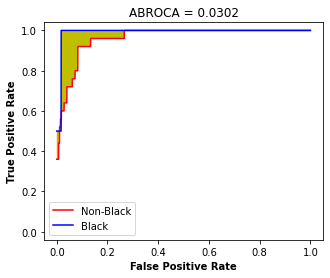

ABROCA: 0.03019816961726502
Equalized odds
{'balanced_accuracy': 0.7381183631183631, 'accuracy': 0.9716193656093489, 'fairness': 0.5307913669064749, 'TPR_protected': 0.0, 'TPR_non_protected': 0.52, 'TNR_protected': 1.0, 'TNR_non_protected': 0.9892086330935251}
Statistical parity
{'balanced_accuracy': 0.7381183631183631, 'accuracy': 0.9716193656093489, 'fairness': 0.052805280528052806, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.052805280528052806, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 0.9471947194719472}


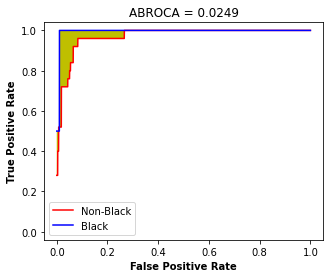

ABROCA: 0.024928249494380727
(1, 660, 104) (1, 660, 104)
[[ 0.00000000e+00  0.00000000e+00]
 [-4.86736784e-04 -1.30538925e-03]
 [ 0.00000000e+00 -5.93097532e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00

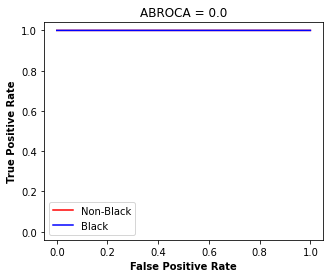

ABROCA: 0.0


In [263]:
run_eval('crime')

Equalized odds
{'balanced_accuracy': 0.5540802283500688, 'accuracy': 0.8431952662721893, 'fairness': 0.21947075166083824, 'TPR_protected': 0.1826086956521739, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9606126914660832, 'TNR_non_protected': 0.9974747474747475}
Statistical parity
{'balanced_accuracy': 0.5540802283500688, 'accuracy': 0.8431952662721893, 'fairness': -0.06591937474290414, 'Positive_prot_pred': 0.06818181818181818, 'Positive_non_prot_pred': 0.0022624434389140274, 'Negative_prot_pred': 0.9318181818181818, 'Negative_non_prot_pred': 0.997737556561086}


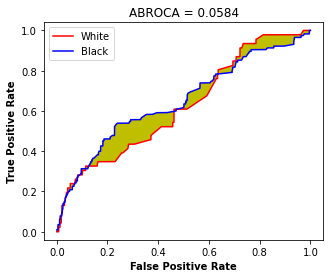

ABROCA: 0.058443566486481954
Equalized odds
{'balanced_accuracy': 0.5453496246350112, 'accuracy': 0.8412228796844181, 'fairness': 0.18176873866627455, 'TPR_protected': 0.1565217391304348, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9671772428884027, 'TNR_non_protected': 0.9924242424242424}
Statistical parity
{'balanced_accuracy': 0.5453496246350112, 'accuracy': 0.8412228796844181, 'fairness': -0.05090497737556561, 'Positive_prot_pred': 0.057692307692307696, 'Positive_non_prot_pred': 0.006787330316742082, 'Negative_prot_pred': 0.9423076923076923, 'Negative_non_prot_pred': 0.9932126696832579}


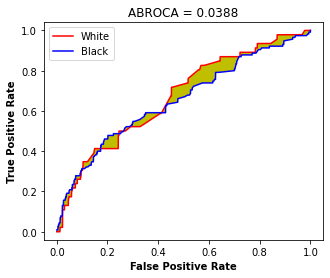

ABROCA: 0.038797676043511094
(1, 1017, 7) (1, 1017, 7)
Equalized odds
{'balanced_accuracy': 0.5596894624932008, 'accuracy': 0.8506787330316742, 'fairness': 0.24809269767413447, 'TPR_protected': 0.21348314606741572, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9603399433427762, 'TNR_non_protected': 0.9949494949494949}
Statistical parity
{'balanced_accuracy': 0.5596894624932008, 'accuracy': 0.8506787330316742, 'fairness': -0.07013574660633484, 'Positive_prot_pred': 0.0746606334841629, 'Positive_non_prot_pred': 0.004524886877828055, 'Negative_prot_pred': 0.9253393665158371, 'Negative_non_prot_pred': 0.995475113122172}


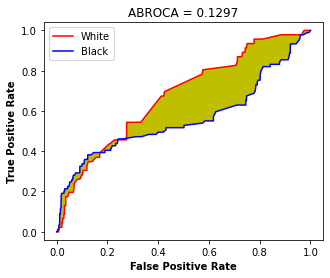

ABROCA: 0.12969587863793974


In [239]:
run_eval('compas-viol')

Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.7822222222222223, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.7822222222222223, 'fairness': 0.0, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.0, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 1.0}


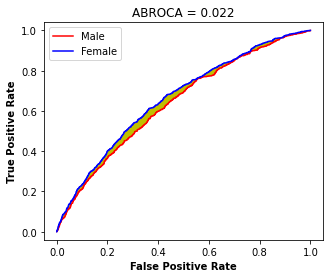

ABROCA: 0.021980497006006624
Equalized odds
{'balanced_accuracy': 0.500155090445269, 'accuracy': 0.7818888888888889, 'fairness': 0.0008612791864560841, 'TPR_protected': 0.0008968609865470852, 'TPR_non_protected': 0.001183431952662722, 'TNR_protected': 0.9990638895389656, 'TNR_non_protected': 0.9996385977593061}
Statistical parity
{'balanced_accuracy': 0.500155090445269, 'accuracy': 0.7818888888888889, 'fairness': -0.0003742782657166041, 'Positive_prot_pred': 0.0009279881217520415, 'Positive_non_prot_pred': 0.0005537098560354374, 'Negative_prot_pred': 0.999072011878248, 'Negative_non_prot_pred': 0.9994462901439646}


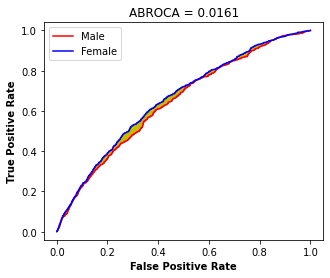

ABROCA: 0.016101338336762104
(1, 8276, 23) (1, 8276, 23)
Equalized odds
{'balanced_accuracy': 0.6056740040797456, 'accuracy': 0.8055094130675526, 'fairness': 0.01694889071220096, 'TPR_protected': 0.24966974900924702, 'TPR_non_protected': 0.24378698224852072, 'TNR_protected': 0.9702276707530648, 'TNR_non_protected': 0.9591615468015902}
Statistical parity
{'balanced_accuracy': 0.6056740040797456, 'accuracy': 0.8055094130675526, 'fairness': 0.01245847176079734, 'Positive_prot_pred': 0.07585825027685493, 'Positive_non_prot_pred': 0.08831672203765227, 'Negative_prot_pred': 0.9241417497231451, 'Negative_non_prot_pred': 0.9116832779623477}


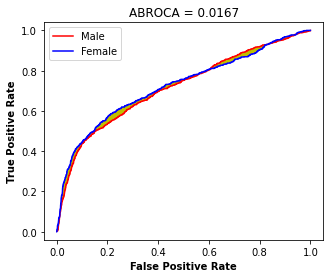

ABROCA: 0.01669466340552187


In [242]:
run_eval('credit')

Equalized odds
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.5042999187979462, 'TPR_protected': 0.909985935302391, 'TPR_non_protected': 0.9954695222405272, 'TNR_protected': 0.525096525096525, 'TNR_non_protected': 0.10628019323671498}
Statistical parity
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.1936618478452239, 'Positive_prot_pred': 0.7938144329896907, 'Positive_non_prot_pred': 0.9874762808349146, 'Negative_prot_pred': 0.20618556701030927, 'Negative_non_prot_pred': 0.012523719165085389}


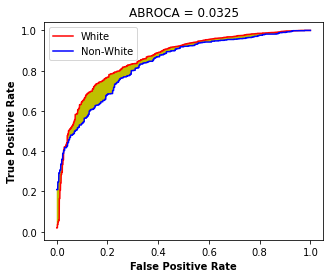

ABROCA: 0.03254560559772433
Equalized odds
{'balanced_accuracy': 0.6211641462865842, 'accuracy': 0.9067307692307692, 'fairness': 0.4653705499291168, 'TPR_protected': 0.9156118143459916, 'TPR_non_protected': 0.9954695222405272, 'TNR_protected': 0.4942084942084942, 'TNR_non_protected': 0.10869565217391304}
Statistical parity
{'balanced_accuracy': 0.6211641462865842, 'accuracy': 0.9067307692307692, 'fairness': 0.18110096050392221, 'Positive_prot_pred': 0.8061855670103093, 'Positive_non_prot_pred': 0.9872865275142315, 'Negative_prot_pred': 0.19381443298969073, 'Negative_non_prot_pred': 0.012713472485768502}


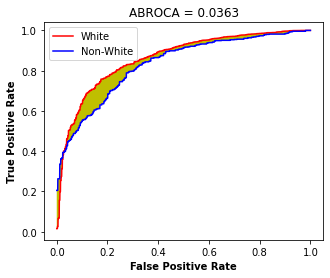

ABROCA: 0.0363265204975134
(1, 2337, 11) (1, 2337, 11)
Equalized odds
{'balanced_accuracy': 0.6823546938027136, 'accuracy': 0.8654639175257732, 'fairness': 0.3698826900869002, 'TPR_protected': 0.9170182841068917, 'TPR_non_protected': 0.988950276243094, 'TNR_protected': 0.4671814671814672, 'TNR_non_protected': 0.16923076923076924}
Statistical parity
{'balanced_accuracy': 0.6823546938027136, 'accuracy': 0.8654639175257732, 'fairness': 0.16391752577319585, 'Positive_prot_pred': 0.8144329896907216, 'Positive_non_prot_pred': 0.9783505154639175, 'Negative_prot_pred': 0.18556701030927836, 'Negative_non_prot_pred': 0.021649484536082474}


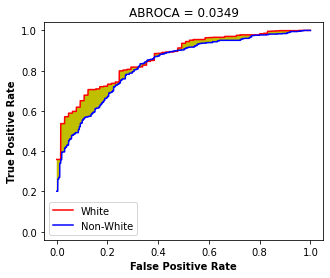

ABROCA: 0.034927188217333635


In [245]:
run_eval('law')

Equalized odds
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.17142857142857137, 'Positive_prot_pred': 0.4, 'Positive_non_prot_pred': 0.5714285714285714, 'Negative_prot_pred': 0.6, 'Negative_non_prot_pred': 0.42857142857142855}


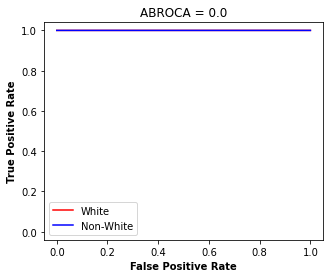

ABROCA: 0.0
Equalized odds
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.17142857142857137, 'Positive_prot_pred': 0.4, 'Positive_non_prot_pred': 0.5714285714285714, 'Negative_prot_pred': 0.6, 'Negative_non_prot_pred': 0.42857142857142855}


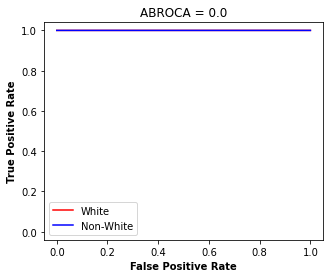

ABROCA: 0.0
(1, 35, 5) (1, 35, 5)
Equalized odds
{'balanced_accuracy': 0.78125, 'accuracy': 0.7666666666666667, 'fairness': 0.9, 'TPR_protected': 0.0, 'TPR_non_protected': 0.9, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.78125, 'accuracy': 0.7666666666666667, 'fairness': 0.6, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.6, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 0.4}


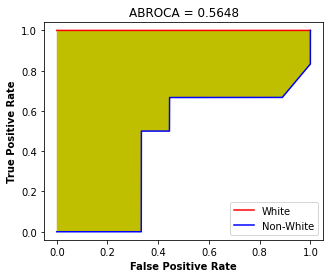

ABROCA: 0.5647814781304055


In [248]:
run_eval('ricci')

[[-0.32313796 -0.31639707 -0.96353631 -0.24984719 -0.94108806 -0.6739793
   0.17607083 -0.7619572  -0.28384199  0.04145031  0.05909819  0.25654297
   0.34004938 -0.77468828 -0.10888718 -0.56816003 -0.21496175  0.33955528
  -0.60766723 -0.61675544  0.3064545  -0.67397849 -0.30043932  0.68257848
   0.01940939 -0.27632672 -0.15644289  0.38636523 -0.37711395 -0.03522473
   0.56689958  1.8849398 ]]
Equalized odds
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.1615643050278025, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 0.8421052631578947}
Statistical parity
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.20407009609949123, 'Positive_prot_pred': 0.5172413793103449, 'Positive_non_prot_pred': 0.7213114754098361, 'Negative_prot_pred': 0.4827586206896552, 'Negative_non_prot_pred': 0.2786885245901639}


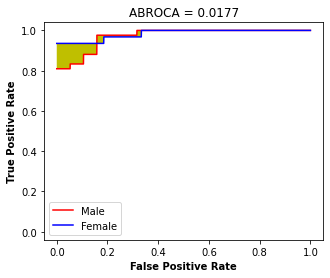

ABROCA: 0.017652299268397953
Equalized odds
{'balanced_accuracy': 0.9154258487194759, 'accuracy': 0.9159663865546218, 'fairness': 0.15157966601090533, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9047619047619048, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 0.8421052631578947}
Statistical parity
{'balanced_accuracy': 0.9154258487194759, 'accuracy': 0.9159663865546218, 'fairness': 0.1548897682306387, 'Positive_prot_pred': 0.5172413793103449, 'Positive_non_prot_pred': 0.6721311475409836, 'Negative_prot_pred': 0.4827586206896552, 'Negative_non_prot_pred': 0.32786885245901637}


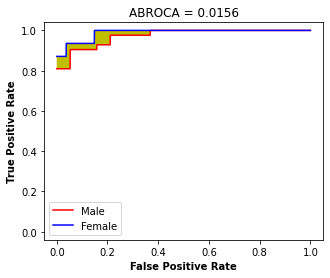

ABROCA: 0.015622264135337557
(1, 126, 32) (1, 126, 32)
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-1.01407305 -1.11573121]
 [ 0.          0.        ]
 [ 0.         -1.501468  ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.83305294 -0.78262845]
 [-0.58159104  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          1.39807143]
 [ 0.          0.        ]
 [ 0.         -1.10727605]
 [ 0.          0.        ]
 [-1.88284858  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.47880116]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.62919952  0.        ]
 [ 0.         -0.00564749]
 [ 0.6066355   0.26255325]
 [ 1.9432103   2.00620841]]
Equalized odds
{'balanced_accuracy': 0.8981220657276996, 'accuracy': 0.905172413

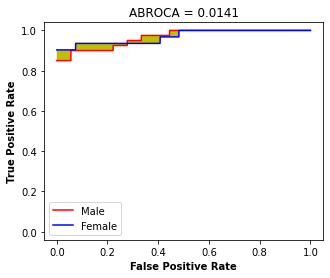

ABROCA: 0.014052994786936206


In [32]:
run_eval('student-mat')

[[-1.17567462 -0.02251894  0.46557765  0.19442516  0.41010979 -0.31610154
  -0.10112269 -0.1508307   0.1763111  -0.19213938  0.26011418 -0.14693851
   0.15714995  0.03930908  0.1296843   0.50797671  0.12321998 -0.63997336
   0.14439183 -0.14248421  0.38404996 -0.00356921 -0.52922778 -0.12493953
  -0.16947207  0.06621767 -0.41576596 -0.0147009  -0.21854558 -0.01015414
   0.6775537   1.67097165]]
Equalized odds
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': 0.04901703800786372, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.95, 'TNR_protected': 0.75, 'TNR_non_protected': 0.7142857142857143}
Statistical parity
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': -0.06823765914675006, 'Positive_prot_pred': 0.8925619834710744, 'Positive_non_prot_pred': 0.8243243243243243, 'Negative_prot_pred': 0.10743801652892562, 'Negative_non_prot_pred': 0.17567567567567569}


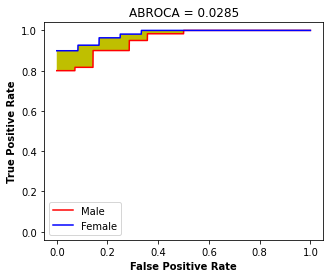

ABROCA: 0.02850680671658694
Equalized odds
{'balanced_accuracy': 0.8195266272189349, 'accuracy': 0.9128205128205128, 'fairness': 0.12009611183923119, 'TPR_protected': 0.9724770642201835, 'TPR_non_protected': 0.9, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.7142857142857143}
Statistical parity
{'balanced_accuracy': 0.8195266272189349, 'accuracy': 0.9128205128205128, 'fairness': -0.1253071253071253, 'Positive_prot_pred': 0.9090909090909091, 'Positive_non_prot_pred': 0.7837837837837838, 'Negative_prot_pred': 0.09090909090909091, 'Negative_non_prot_pred': 0.21621621621621623}


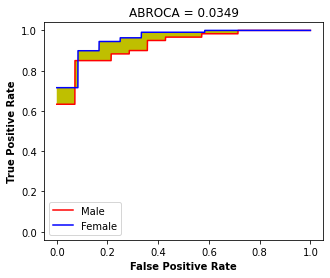

ABROCA: 0.034943611720239624
(1, 192, 32) (1, 192, 32)
[[-2.4678628  -2.37168338]
 [ 0.          0.        ]
 [-0.19682683 -0.60324848]
 [ 0.          1.32276257]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.35278154 -0.48255307]
 [-0.89040601  0.        ]
 [ 0.3104087   0.        ]
 [-1.62308638 -0.37653121]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.6848973   0.        ]
 [ 0.          0.86076209]
 [ 0.          1.84005974]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.         -2.00912111]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.75091535  0.        ]
 [-0.84519819 -0.43646599]
 [-0.4684952   0.67448935]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.73375122 -0.31615134]
 [ 0.         -0.15248356]
 [ 1.25707561  0.41701387]
 [ 1.26199672  1.36295363]]
Equalized odds
{'balanced_accuracy': 0.7019583843329253, 'accuracy': 0.871621621

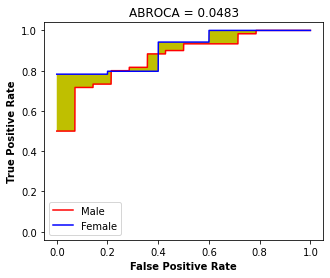

ABROCA: 0.04828481765604881


In [265]:
run_eval('student-por')

[[-7.73435915e-02 -8.72879144e-02  3.17353048e-05 -2.39499133e-06
  -2.31972296e-02 -1.17660292e-01 -1.17834556e-01 -4.31156445e-02
  -3.65675996e-02 -4.35104473e-02 -6.91599255e-03 -2.25156289e-01
   3.70648184e-04 -4.37853006e-02]]
Equalized odds
{'balanced_accuracy': 0.9621383763326734, 'accuracy': 0.9708469647400945, 'fairness': 0.014519797220210351, 'TPR_protected': 0.9436619718309859, 'TPR_non_protected': 0.9453972698634932, 'TNR_protected': 0.9870032491877031, 'TNR_non_protected': 0.97421875}
Statistical parity
{'balanced_accuracy': 0.9621383763326734, 'accuracy': 0.9708469647400945, 'fairness': 0.19377428581680195, 'Positive_prot_pred': 0.11582925744775456, 'Positive_non_prot_pred': 0.3096035432645565, 'Negative_prot_pred': 0.8841707425522455, 'Negative_non_prot_pred': 0.6903964567354435}


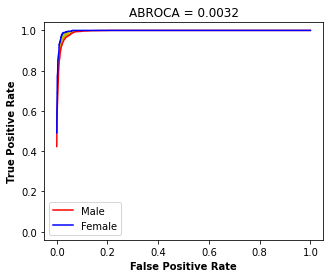

ABROCA: 0.003195865643512236
Equalized odds
{'balanced_accuracy': 0.9627541145675582, 'accuracy': 0.9705561613958561, 'fairness': 0.020819687289695077, 'TPR_protected': 0.9436619718309859, 'TPR_non_protected': 0.9481974098704935, 'TNR_protected': 0.9880029992501874, 'TNR_non_protected': 0.97171875}
Statistical parity
{'balanced_accuracy': 0.9627541145675582, 'accuracy': 0.9705561613958561, 'fairness': 0.1972562025454353, 'Positive_prot_pred': 0.11493997332147621, 'Positive_non_prot_pred': 0.3121961758669115, 'Negative_prot_pred': 0.8850600266785238, 'Negative_non_prot_pred': 0.6878038241330885}


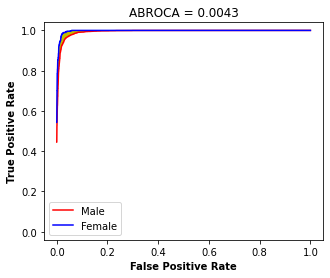

ABROCA: 0.004264563025725771
(1, 10347, 14) (1, 10347, 14)
[[ 5.42447939e-03 -1.04779253e-01]
 [ 0.00000000e+00 -6.56218591e-02]
 [-1.13123499e-04  3.30175726e-05]
 [-3.39156635e-04  2.72922336e-04]
 [ 0.00000000e+00 -2.89842642e-01]
 [-4.95424569e-02 -2.27949653e-01]
 [ 0.00000000e+00 -4.47825733e-01]
 [ 0.00000000e+00 -2.57464876e-01]
 [ 0.00000000e+00 -5.80734610e-01]
 [ 0.00000000e+00 -6.69434939e-01]
 [-6.30071507e+01  0.00000000e+00]
 [ 8.52456079e-03 -1.62759335e-01]
 [ 1.26347339e-03  5.30912808e-04]
 [ 0.00000000e+00 -5.90274103e-02]]
Equalized odds
{'balanced_accuracy': 0.852206280351743, 'accuracy': 0.9329702089817696, 'fairness': 0.3148426725221489, 'TPR_protected': 0.9396378269617707, 'TPR_non_protected': 0.6317280453257791, 'TNR_protected': 0.989502624343914, 'TNR_non_protected': 0.9964355152300713}
Statistical parity
{'balanced_accuracy': 0.852206280351743, 'accuracy': 0.9329702089817696, 'fairness': 0.08759448643841707, 'Positive_prot_pred': 0.11316140506891952, 'Positi

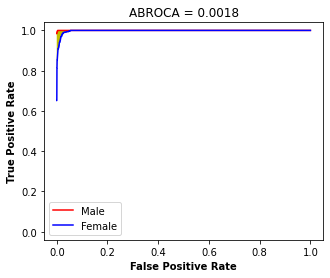

ABROCA: 0.0018416193056725416


In [262]:
run_eval('adult-reconstruction')

In [2]:

X = np.array([[3., 1.], [2., 0.], [0., 2.], [-1., 3.]])
print(X.shape)
# and target y (n_tasks, n_samples)
y = np.array([-3., 1., 1., -2.])
print(y.shape)
model = Lasso(alpha=1.0)
model.fit(X,y)

(4, 2)
(4,)


Lasso()

In [12]:
import numpy as np
from mutar import GroupLasso
from mutar import IndRewLasso
from mutar import IndRewLogistic
# create some X (n_tasks, n_samples, n_features)
X = np.array([[[3, 1], [2, 0], [1, 0]],[[0, 2], [-1, 3], [1, -2]]], dtype=float)
#coef = np.array([[1., 1.], [0., -1]])
y = np.array([[0, 1, 1.0],[ 0,1, 0]])
print(X)
print(y)
alpha = [0.1, 0.1]
relasso = IndRewLasso(alpha=alpha).fit(X, y)

print('lasso:',relasso.coef_)

relogistic = IndRewLogistic(alpha=alpha)
print('logistic:',relogistic.coef_)
# and target y (n_tasks, n_samples)
#y = np.array([[-3., 1.], [1., -2.],[1., -2.]])
#X=1/(1+np.exp(X))
#print(y.shape)

#gl = GroupLasso(alpha=1.)
#coef = gl.fit(X, y).coef_
#print(coef.shape)

# coefficients (n_features, n_tasks)
# share the same support


[[[ 3.  1.]
  [ 2.  0.]
  [ 1.  0.]]

 [[ 0.  2.]
  [-1.  3.]
  [ 1. -2.]]]
[[0. 1. 1.]
 [0. 1. 0.]]
lasso: [[ 0.4776577  -0.        ]
 [-1.30148418  0.15398506]]
logistic: [[0. 0.]
 [0. 0.]]
